In [5]:
#install.packages("googledrive")
#library("googledrive")
#if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab_ipython.py")){
#  install.packages("R.utils")
#  library("R.utils")
#  library("httr")
#  my_check <- function() {return(TRUE)}
#  reassignInPackage("is_interactive", pkgName = "httr", my_check)
#  options(rlang_interactive=TRUE)
#}    
#drive_auth(use_oob = TRUE, cache = TRUE)


#from google.colab import drive
#drive.mount('/content/drive')
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
# 6-7 합치기
library(ggplot2)      # ggplot 및 mpg 데이터 
library(dplyr)        # 데이터 가공

NameError: ignored

In [ ]:
# 중간고사 데이터 생성
test1 <- data.frame(id = c(1, 2, 3, 4, 5), midterm = c(60, 80, 70, 90, 85))

# 기말고사 데이터 생성
test2 <- data.frame(id = c(1, 2, 3, 4, 5), final = c(70, 83, 65, 95, 80))

test1; test2


In [ ]:
# 가로합치기
# left_join(test1, test2, by = "id") 주의] by에 변수명을 지정할 때 변수명 앞 뒤에 겹따옴표 입력
total <- left_join(test1, test2, by = "id") # id 기준으로 합쳐 total 에 할당
total

id,midterm,final
<dbl>,<dbl>,<dbl>
1,60,70
2,80,83
3,70,65
4,90,95
5,85,80


In [ ]:
# 담임선생님 명단 예제
name <- data.frame(class=c(1,2,3,4,5), teacher=c('kim','lee',"park","choi","jung"))
name
exam <- read.csv('/content/csv_exam.csv')
head(exam)

class,teacher
<dbl>,<chr>
1,kim
2,lee
3,park
4,choi
5,jung


,id,class,math,english,science
,<int>,<int>,<int>,<int>,<int>
1,1,1,50,98,50
2,2,1,60,97,60
3,3,1,45,86,78
4,4,1,30,98,58
5,5,2,25,80,65
6,6,2,50,89,98


In [ ]:
exam_new <- left_join(exam, name, by = "class")
head(exam_new)

,id,class,math,english,science,teacher
,<int>,<dbl>,<int>,<int>,<int>,<chr>
1,1,1,50,98,50,kim
2,2,1,60,97,60,kim
3,3,1,45,86,78,kim
4,4,1,30,98,58,kim
5,5,2,25,80,65,lee
6,6,2,50,89,98,lee


In [ ]:
# 세로 합치기  bind_rows(group_a, group_b)
# 학생 1~5 번 시험 데이터 생성
group_a <- data.frame(id = c(1, 2, 3, 4, 5), test = c(60, 80, 70, 90, 85))

# 학생 6~10 번 시험 데이터 생성
group_b <- data.frame(id = c(6, 7, 8, 9, 10), test = c(70, 83, 65, 95, 80))

group_a; group_b

In [ ]:
group_all <- bind_rows(group_a, group_b) # 데이터 합쳐서 group_all 에 할당

group_all 

In [ ]:
# .. 6-7 혼자서 해보기
mpg <- as.data.frame(ggplot2::mpg)
head(mpg) 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [ ]:
fuel <- data.frame(fl = c("c", "d", "e", "p", "r"), price_fl = c(2.35, 2.38, 2.11, 2.76, 2.22),
 stringsAsFactors = F)
#fuel1 <- data.frame(fl = c("c", "d", "e", "p", "r"), price_fl = c(2.35, 2.38, 2.11, 2.76, 2.22),
# stringsAsFactors = T)
fuel # 출력
#fuel1


fl,price_fl
<chr>,<dbl>
c,2.35
d,2.38
e,2.11
p,2.76
r,2.22


In [ ]:
mpg_fuel <- left_join(mpg, fuel, by = "fl")
tail(mpg_fuel)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize,2.76


In [ ]:
mpg_fuel %>% select(model, fl, price_fl) %>% head

,model,fl,price_fl
,<chr>,<chr>,<dbl>
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
5,a4,p,2.76
6,a4,p,2.76


In [ ]:
# 6-7 분석도전
midwest <- as.data.frame(ggplot2::midwest)
head(midwest)
dim(midwest)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
2,562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
3,563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
4,564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
5,565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
6,566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


[1] 437  28

In [ ]:
# 문제1
#midwest <- midwest %>% mutate( nadults_ratio = ((poptotal-popadults)/poptotal) * 100. ) %>% head
midwest <- midwest %>% mutate( nadults_ratio = (poptotal-popadults)/poptotal*100.)



In [ ]:
# 문제2
midwest %>%
  arrange(desc(nadults_ratio)) %>%
  select(county,nadults_ratio) %>%
  head(5)

,county,nadults_ratio
,<chr>,<dbl>
1,ISABELLA,51.50117
2,MENOMINEE,50.59126
3,ATHENS,49.32073
4,MECOSTA,49.05918
5,MONROE,47.35818


In [ ]:
# 문제3
midwest <- midwest %>%
 mutate(grade = ifelse(nadults_ratio >= 40, "large", 
                    ifelse(nadults_ratio >= 30, "middle", "small")))

table(midwest$grade) 


 large middle  small 
    32    396      9 

In [ ]:
# 문제4
midwest <- midwest %>% mutate( asian_ratio = (popasian)/poptotal*100.)
head(midwest)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,nadults_ratio,grade,asian_ratio
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>
1,561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR,34.48631,middle,0.37675897
2,562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR,36.72125,middle,0.45172219
3,563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR,35.50130,middle,0.10673071
4,564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU,37.44076,middle,0.48691813
5,565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR,31.81974,middle,0.08567512
6,566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR,34.30845,middle,0.54640215


In [ ]:
midwest %>%
  arrange(asian_ratio) %>%
  select(state, county, asian_ratio) %>%
  head()

,state,county,asian_ratio
,<chr>,<chr>,<dbl>
1,WI,MENOMINEE,0.00000000
2,IN,BENTON,0.01059210
3,IN,CARROLL,0.01594981
4,OH,VINTON,0.02703190
5,WI,IRON,0.03250447
6,IL,SCOTT,0.05315379


# 7 데이터 정제

In [ ]:
# 7-1
df <- data.frame(sex = c("M", "F", NA, "M", "F"), score = c(5, 4, 3, 4, NA))
#df <- data.frame(sex = c("M", "F", NA, "M", "F"), score = c(5, 4, NA, 4, NA))
df

sex,score
<chr>,<dbl>
M,5
F,4
NA,3
M,4
F,NA


In [ ]:
# 결측확인
is.na(df)

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [ ]:
# 결측빈도 
table(is.na(df))


FALSE  TRUE 
    8     2 

In [ ]:
# 결측이 아닌 값만 출력
df %>% filter(!is.na(score))

sex,score
<chr>,<dbl>
M,5
F,4
NA,3
M,4


In [ ]:
df_nomiss <- df %>% filter(!is.na(score))
df_nomiss

sex,score
<chr>,<dbl>
M,5
F,4
NA,3
M,4


In [ ]:
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))
df_nomiss

sex,score
<chr>,<dbl>
M,5
F,4
M,4


In [ ]:
# 결측확인
df_nomiss <- df %>% na.omit(df)
df_nomiss

,sex,score
,<chr>,<dbl>
1,M,5
2,F,4
4,M,4


In [ ]:
# 평균, 결측이 있으면 계산이 안됨
mean(df$score)

[1] NA

In [ ]:
mean(df$score, na.rm=T)

[1] 4

In [ ]:
exam <- read.csv("/content/csv_exam.csv")
exam[c(3,8,15), "math"] <- NA
View(exam)

id,class,math,english,science
<int>,<int>,<int>,<int>,<int>
1,1,50,98,50
2,1,60,97,60
3,1,NA,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,NA,78,25
9,3,20,98,15


In [ ]:
# math 결측치 제외하고 평균
exam %>% summarise(mean_math=mean(math, na.rm=T),
                     sum_math=sum(math, na.rm=T),
                     median_math=median(math, na.rm=T))

mean_math,sum_math,median_math
<dbl>,<int>,<int>
55.23529,939,50


In [ ]:
# 결측치 대체하기 - 평균
table(is.na(exam$math))
exam$math <- ifelse(is.na(exam$math), mean(exam$math, na.rm=T), exam$math)
exam


FALSE 
   20 

id,class,math,english,science
<int>,<int>,<dbl>,<int>,<int>
1,1,50.00000,98,50
2,1,60.00000,97,60
3,1,55.23529,86,78
4,1,30.00000,98,58
5,2,25.00000,80,65
6,2,50.00000,89,98
7,2,80.00000,90,45
8,2,55.23529,78,25
9,3,20.00000,98,15


In [ ]:
# 혼자서 해보기
mpg <- as.data.frame(ggplot2::mpg) # mpg 데이터 불러오기
head(mpg)
dim(mpg)
table(is.na(mpg))

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


[1] 234  11


FALSE 
 2574 

In [ ]:
# 임의 결측 주기
mpg[c(65, 124, 131, 153, 212), "hwy"] <- NA # NA 할당하기


In [ ]:
# Q1
table(is.na(mpg$hwy))
table(is.na(mpg$drv))


FALSE  TRUE 
  229     5 


FALSE 
  234 

In [ ]:
# Q2
mpg %>% filter(!is.na(hwy)) %>%
  group_by(drv) %>%
  summarise(mean_hwy=mean(hwy)) %>%
  head()

drv,mean_hwy
<chr>,<dbl>
4,19.24242
f,28.20000
r,21.00000


In [ ]:
# 결측, 이상치 정제
# 1. 평균,최빈값등 대치, 2. Na 처리

In [ ]:
# 7-2
outlier <- data.frame(sex = c(1, 2, 1, 3, 2, 1), score = c(5, 4, 3, 4, 2, 6))
outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
3,4
2,2
1,6


In [ ]:
# sex:3, score:6 na 대치
outlier$sex <- ifelse(outlier$sex==3, NA, outlier$sex)
outlier$score <- ifelse(outlier$score==6, NA, outlier$score)

table(is.na(outlier))
outlier


FALSE  TRUE 
   10     2 

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
NA,4
2,2
1,NA


In [ ]:
outlier %>%
 filter(!is.na(sex) & !is.na(score)) %>%
 group_by(sex) %>%
 summarise(mean_score = mean(score))


sex,mean_score
<dbl>,<dbl>
1,4
2,3


In [ ]:
outlier %>%
    na.omit(outlier)%>%
    group_by(sex) %>%
    summarise(mean_score = mean(score))

sex,mean_score
<dbl>,<dbl>
1,4
2,3


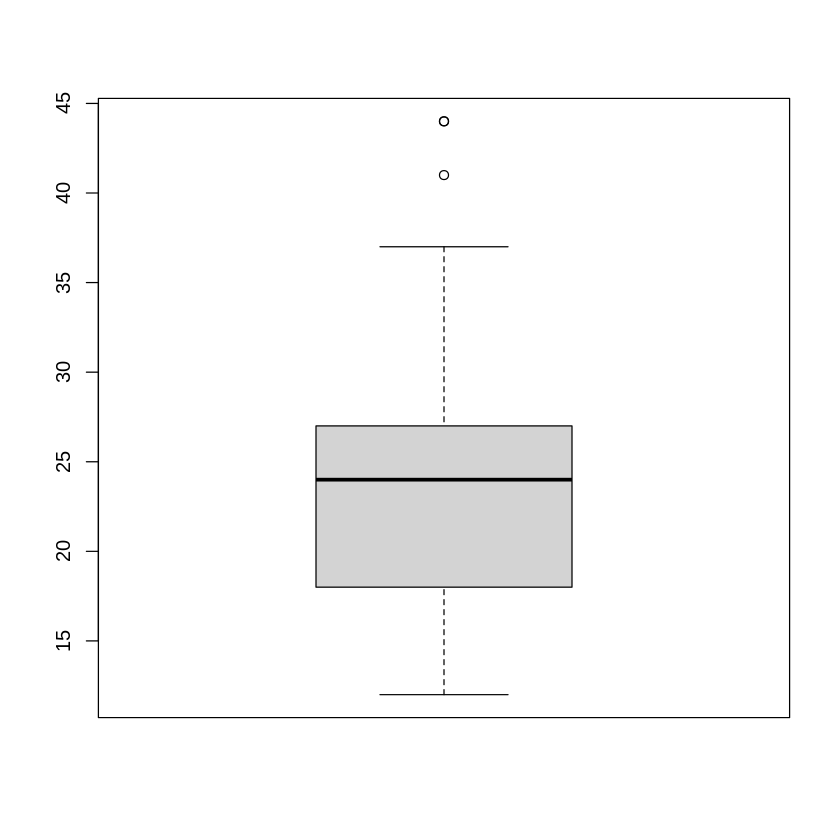

In [ ]:
# 이상치 제거
mpg <- as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy) # 상위 2개 이상치

In [ ]:
# hwy 12 ~ 37 벗어나면 Na 할당
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy < 37, NA, mpg$hwy)
table(is.na(mpg$hwy))


FALSE  TRUE 
    4   230 

In [ ]:
# 결측치 뺴고 평균
mpg %>% group_by(drv) %>%
  summarise(mean_hwy=mean(hwy, na.rm=T))

drv,mean_hwy
<chr>,<dbl>
4,NaN
f,41.5
r,NaN


In [ ]:
# 혼자서 해보기
mpg <- as.data.frame(ggplot2::mpg) # mpg 데이터 불러오기
mpg[c(10, 14, 58, 93), "drv"] <- "k" # drv 이상치 할당
mpg[c(29, 43, 129, 203), "cty"] <- c(3, 4, 39, 42) # cty 이상치 할당

In [ ]:
# Q1
# check
table(mpg$drv)

# rm
mpg$drv <- ifelse(mpg$drv %in% c("4","f","r"), mpg$drv, NA)
table(mpg$drv)


  4   f   k   r 
100 106   4  24 


  4   f   r 
100 106  24 

9
14
17
19
26


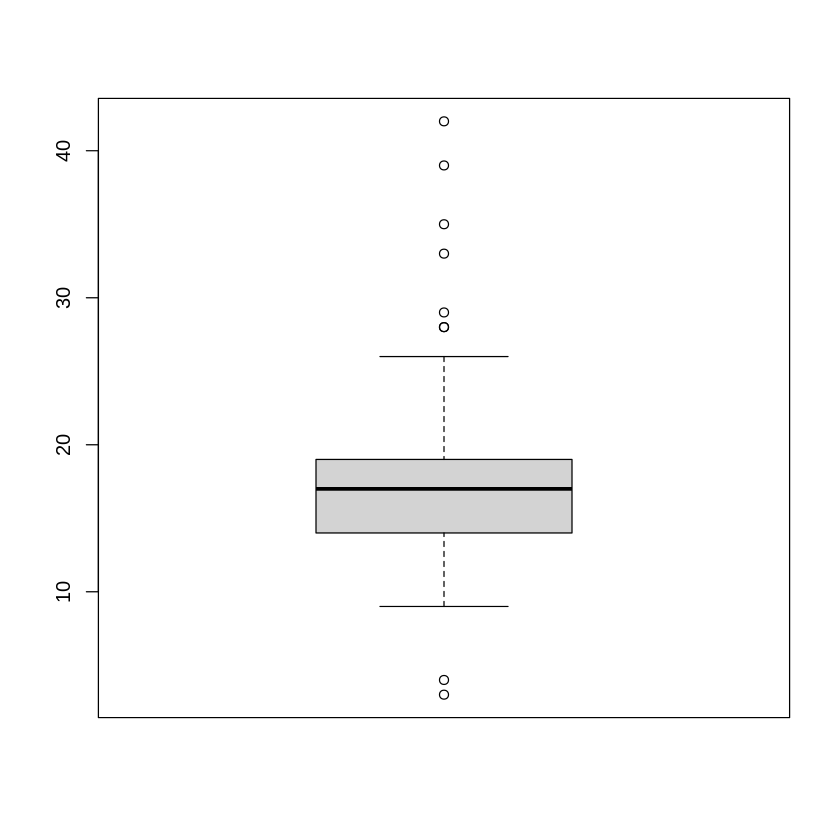

In [ ]:
# Q2
boxplot(mpg$cty)
boxplot(mpg$cty)$stats  # 분위수 산출

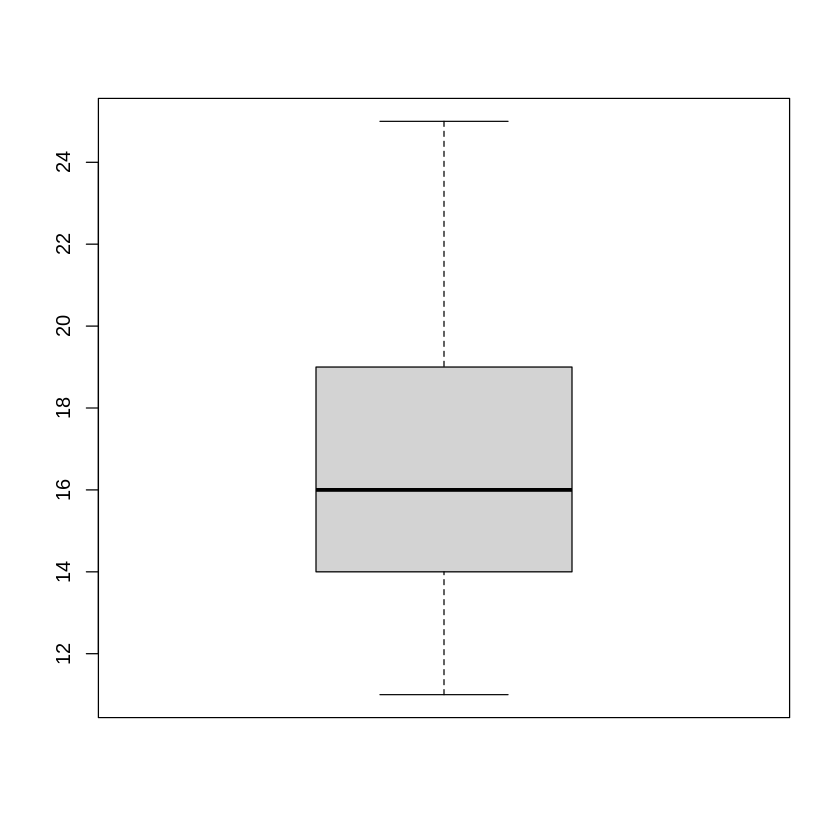

In [ ]:
mpg$cty <- ifelse(mpg$cty <= 9 | mpg$cty >= 26, NA, mpg$cty)
boxplot(mpg$cty)

In [ ]:
# Q3
mpg %>% filter(!is.na(drv) & !is.na(cty)) %>%
  group_by(drv) %>%
  summarise(mean_cty = mean(cty, rm.na=T))

drv,mean_cty
<chr>,<dbl>
4,14.53261
f,19.26804
r,13.95833


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

